In [30]:
using BasisFunctions
using FrameFuns
using PyPlot
using Interact, Reactive

### One-dimensional approximations

In [31]:
B = FourierBasis(61);
D = Interval(-0.5,0.5);
f1(x) = x
F1 = Fun(f1,B,D)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


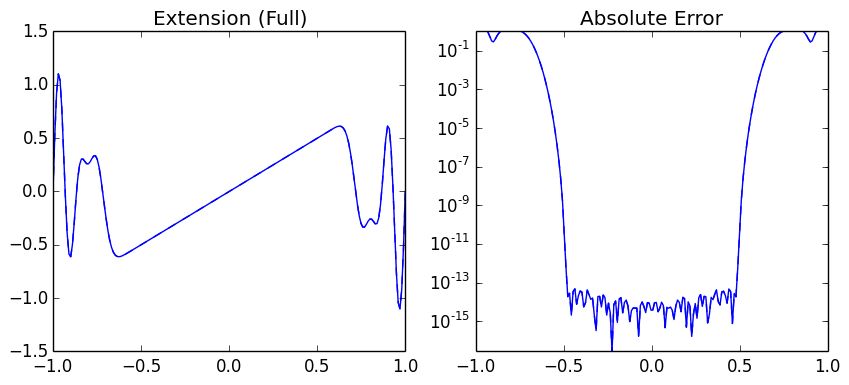

PyObject <matplotlib.text.Text object at 0x328c0afd0>

In [32]:
figure(figsize=(10,4))
subplot(121); plot_expansion(F1)
subplot(122); plot_error(F1,f1)

In [4]:
F1(0.3)

0.3000000000000157 + 1.1129985821867194e-14im

In [5]:
f2(x) = cos(80*x)
F2 = Fun(f2, B, D)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


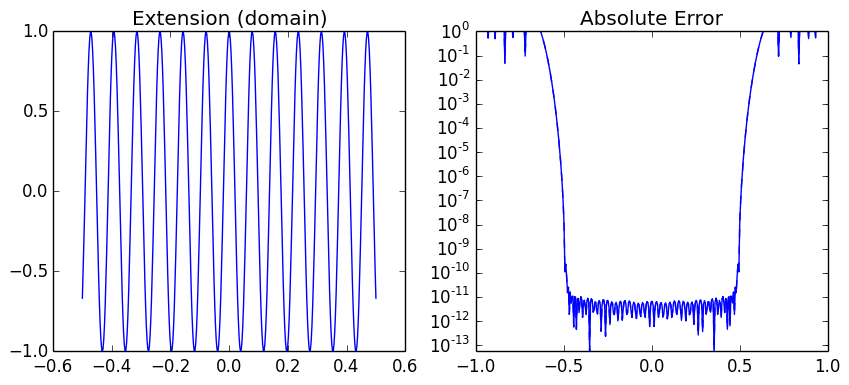

PyObject <matplotlib.text.Text object at 0x320eba950>

In [6]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot(F2,n=400)
subplot(122); FrameFuns.plot_error(F2,f2,n=400)

In [7]:
f3(x) = cos(10*x.^2)
B = ChebyshevBasis(41)
D = Interval(-0.9,0.9)
F3 = Fun(f3,B,D)

A 1-dimensional FrameFun with 41 degrees of freedom.
Basis: Chebyshev series (first kind)
Domain: the interval [-0.9, 0.9]


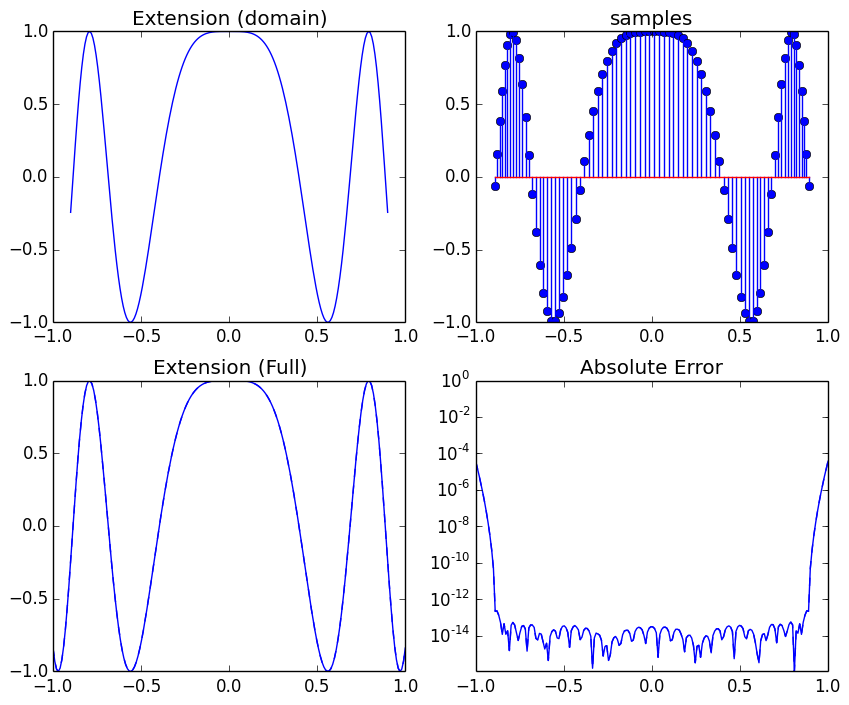

PyObject <matplotlib.text.Text object at 0x32155d110>

In [8]:
figure(figsize=(10,8))
subplot(221); FrameFuns.plot(F3)
subplot(222); plot_samples(F3)
subplot(223); plot_expansion(F3)
subplot(224); plot_error(F3,f3)

### Singular Value Distribution

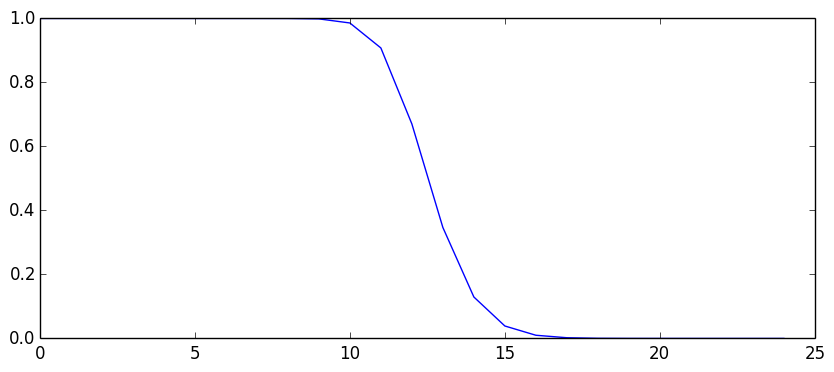

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x328d58190>

In [33]:
figure(figsize=(10,4))
D = Interval(-0.5,0.5)
B = FourierBasis(25)
F = Fun(x->x,B,D)
USV = svd(matrix(F))
PyPlot.plot(USV[2])

Interact.Slider{Int64}([Reactive.Input{Int64}] 13,"i",13,1:25)

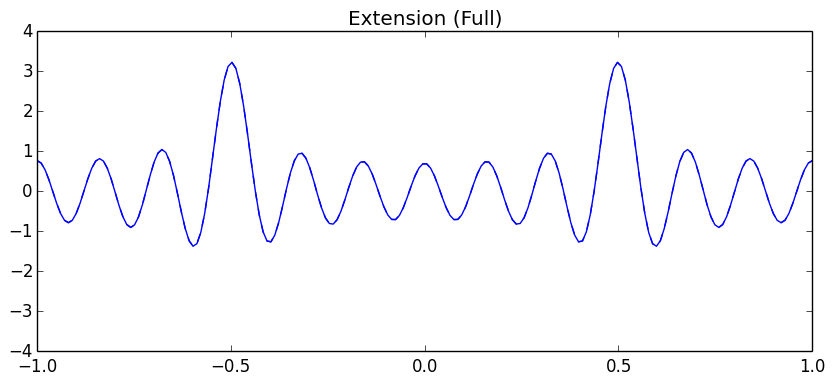

In [34]:
h = figure(figsize=(10,4))
@manipulate for i=1:length(USV[2]); withfig(h) do
        F = FrameFun(D,B,USV[3][:,i])
        plot_expansion(F)
        ylim([-4,4])
    end
end

### High precision

In [11]:
B = FourierBasis(61,Complex{BigFloat})
D = Interval(-0.5,0.5)
fh(x) = x
Fh = Fun(fh,B,D)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


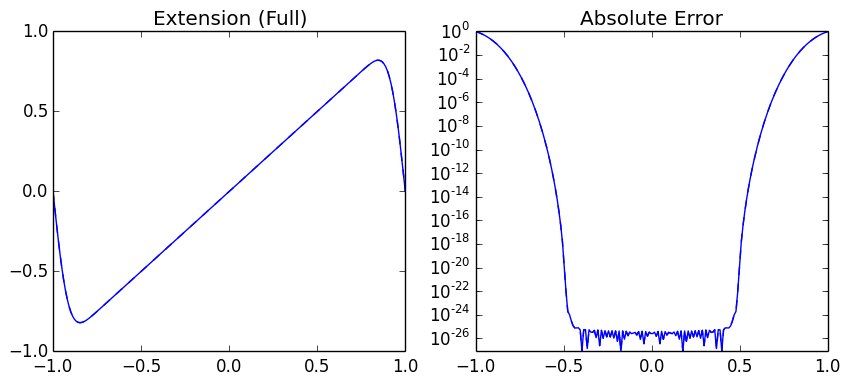

PyObject <matplotlib.text.Text object at 0x3201d6cd0>

In [12]:
figure(figsize=(10,4))
subplot(121); plot_expansion(Fh)
subplot(122); plot_error(Fh,fh)

### 2D approximations

##### Simple domains and simple functions

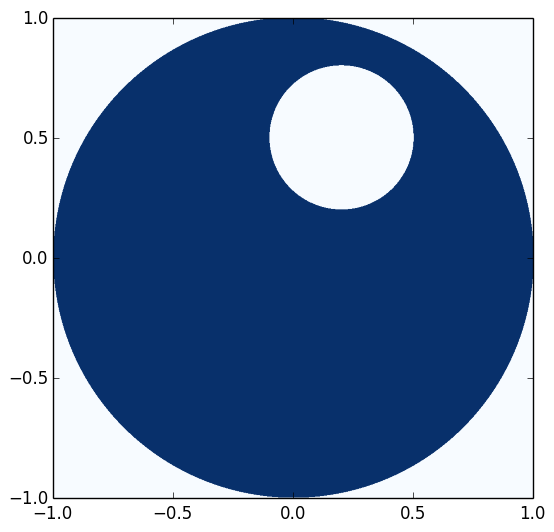

PyObject <matplotlib.image.AxesImage object at 0x320b8ded0>

In [13]:
C = Disk(1.0)- Disk(0.3,[0.2; 0.5]); FrameFuns.plot_domain(C, n=1000)

In [14]:
B = FourierBasis(31,-1.3,1.3) ⊗ FourierBasis(31,-1.3,1.3)
f(x,y) = exp(x+y)
F = Fun(f,B,C)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.3  ,  1.3 ] x Fourier series, mapped to [ -1.3  ,  1.3 ])
Domain: the difference of two domains: 
    First domain: a circle of radius 1.0 centered at [0.0,0.0]
    Second domain: a circle of radius 1.0 centered at [0.0,0.0]



In [15]:
F(-0.6,0.4)

0.8187308535547686 - 1.7005419294946478e-10im

In [16]:
f(-0.6, 0.4)

0.8187307530779819

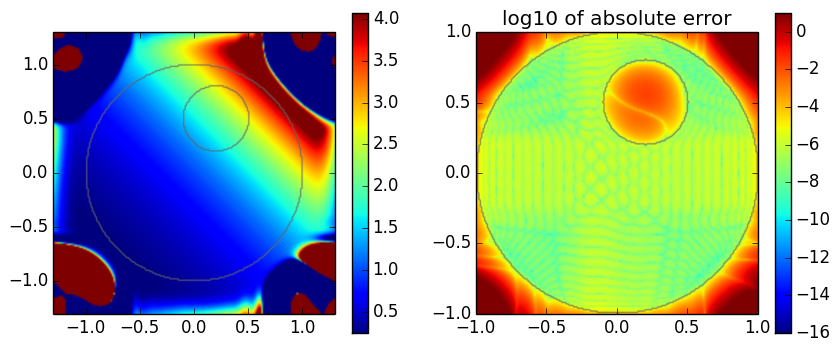

PyObject <matplotlib.text.Text object at 0x33a288390>

In [17]:
figure(figsize=(10,4))
subplot(121); plot_image(F,n=201)
subplot(122); plot_error(F,f,n=201)

##### Simple domains and harder functions

In [18]:
dom = FrameFuns.randomcircles(10)

a collection of 10 domains

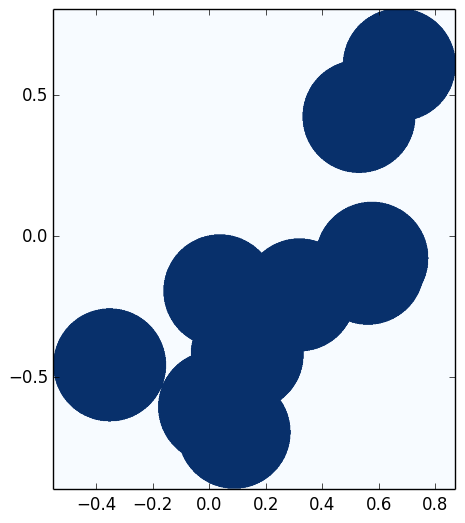

In [19]:
FrameFuns.plot_domain(dom,n=1000);

In [20]:
B = FourierBasis(31) ⊗ ChebyshevBasis(31)
f(x,y) = cos(20*x+22*y)
F = Fun(f,B,dom)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series x Chebyshev series (first kind))
Domain: a collection of 10 domains


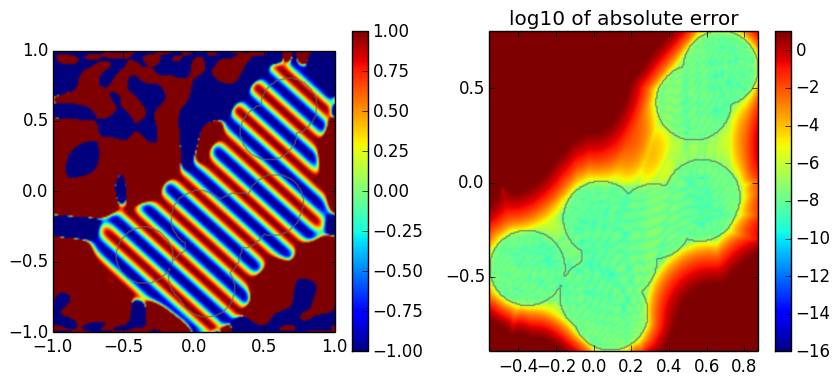

PyObject <matplotlib.text.Text object at 0x322d04a90>

In [21]:
figure(figsize=(10,4))
subplot(121); plot_image(F,n=201)
subplot(122); plot_error(F,f,n=201)

##### Fractal domains

In [22]:
mandelbrot=FrameFuns.Mandelbrot()

The Mandelbrot set

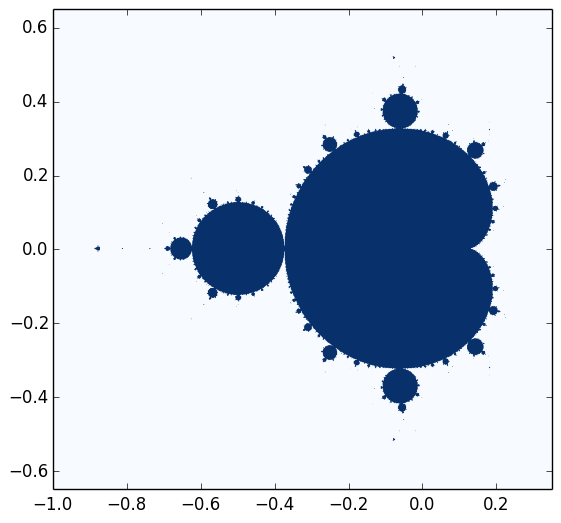

PyObject <matplotlib.image.AxesImage object at 0x326a98090>

In [23]:
plot_domain(mandelbrot, n=1001)

In [24]:
B = FourierBasis(31,-1.0,0.35) ⊗ FourierBasis(31,-0.65,0.65)
f(x,y) = cos(10*x*y)
F = Fun(f, B, mandelbrot)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.0  ,  0.35 ] x Fourier series, mapped to [ -0.65  ,  0.65 ])
Domain: The Mandelbrot set


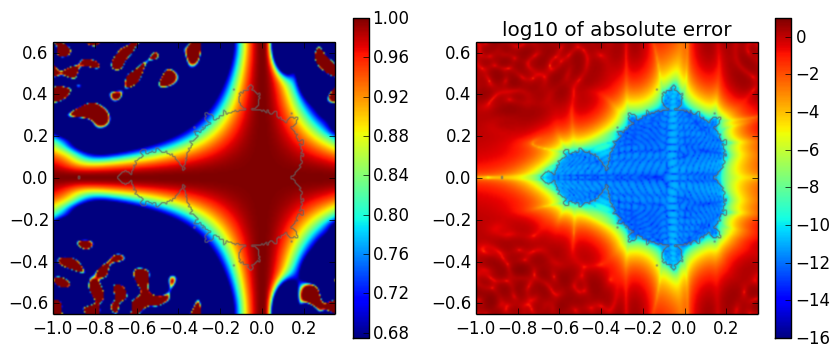

PyObject <matplotlib.text.Text object at 0x324a241d0>

In [25]:
figure(figsize=(10,4))
subplot(121); plot_image(F,n=201)
subplot(122); plot_error(F,f,n=201)

In [26]:
julia = JuliaSet()

A particular Julia Set also known as the Douady rabbit

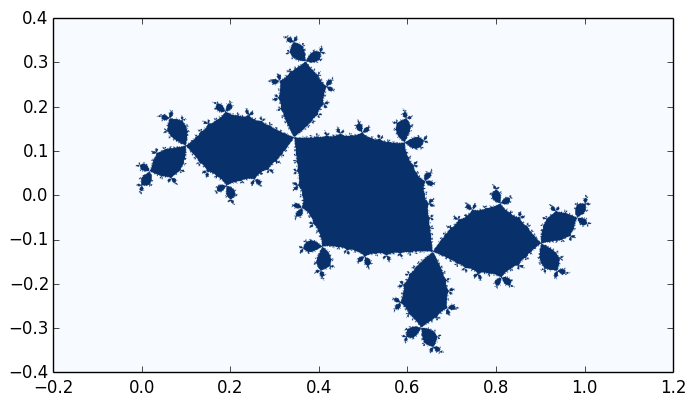

PyObject <matplotlib.image.AxesImage object at 0x325795b10>

In [27]:
plot_domain(julia)

In [28]:
B = ChebyshevBasis(31,-0.2,1.2) ⊗ ChebyshevBasis(31, -0.4, 0.4)
f(x,y) = cos(10*x*y)
F = Fun(f, B, julia)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Chebyshev series (first kind), mapped to [ -0.2  ,  1.2 ] x Chebyshev series (first kind), mapped to [ -0.4  ,  0.4 ])
Domain: A particular Julia Set also known as the Douady rabbit


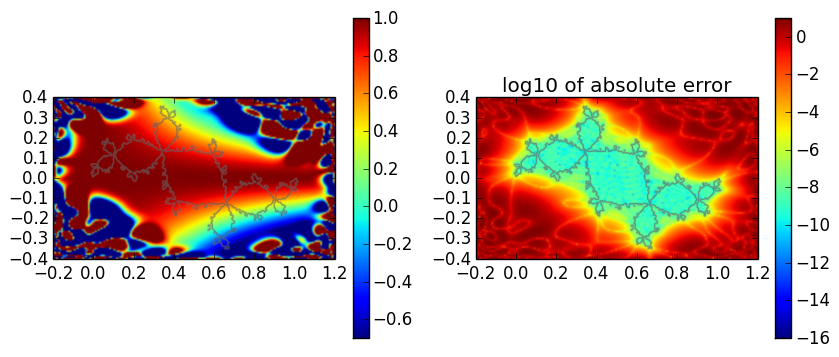

PyObject <matplotlib.text.Text object at 0x325e8f490>

In [29]:
figure(figsize=(10,4))
subplot(121); plot_image(F,n=201)
subplot(122); plot_error(F,f,n=201)